## HLW_Covid

In [1]:
# 설치 없이 상태경로로 모듈을 가져오는 부분입니다
import sys
import os
parent_dir = os.path.abspath("../")
sys.path.append(parent_dir)

import bok_da

In [2]:
import pandas as pd
import numpy as np
import datetime

In [3]:
USData = pd.read_excel("data/USData_covid.xlsx")
data = USData.set_index("DATE")
data = data.drop("FinancialCycle", axis=1)  # Covid 모형의 컬럼 구성: [lnRGDP, Inflation, Rrate, StringencyIndex, CovidIndicator]
data

,LnRGDP,Inflation,Rrate,StringencyIndex,CovidIndicator
DATE,,,,,
1962-01-01,3292.672518,1.480963,1.084135,0.00000,0
1962-04-01,3296.275262,1.541078,1.177122,0.00000,0
1962-07-01,3301.163538,1.314688,1.523314,0.00000,0
1962-10-01,3302.478980,0.748789,1.651954,0.00000,0
1963-01-01,3306.823661,1.324180,1.734483,0.00000,0
...,...,...,...,...,...
2023-04-01,4009.208387,3.793178,0.450516,23.29854,0
2023-07-01,4013.471677,2.336287,1.412127,19.41545,0
2023-10-01,4016.613993,2.007605,2.134268,15.53236,0


In [4]:
# 테스트 설정입니다. 실제 사용시에는 충분한 수의 draws와 burnin을 설정해야 합니다.
model = bok_da.HLW_Covid(n_draws=2000, burnin=100)

> Initializing Model...
  - Total MCMC iterations: 2000
  - Burn-in period: 100
  - Latent variables percentiles: [5, 95]
  - Parameters percentiles: [0.05, 0.95]
  - Interest rate z-component specification: rw


In [5]:
model.fit(data, dates=data.index)

> Starting model fitting...
  - Data shape: (250, 5)
  - Dates provided with length: 250


Step 3/3 : 100%|██████████| 2000/2000 [07:49<00:00,  4.26it/s] 

> Model Fitted.


In [6]:
# Container Class
model.ParaStorage.variable_summary()

added | variable | type    |   size(KB) | info
---------------------------------------------------
    1 | phi_yc   | ndarray |     29.812 | shape=(1900, 2)
    2 | beta_yc  | ndarray |     14.969 | shape=(1900, 1)
    3 | sig2_yc  | ndarray |     14.969 | shape=(1900, 1)
    4 | sig2_yt  | ndarray |     14.969 | shape=(1900, 1)
    5 | sig2_g   | ndarray |     14.969 | shape=(1900, 1)
    6 | phi_p    | ndarray |     14.969 | shape=(1900, 1)
    7 | beta_p   | ndarray |     14.969 | shape=(1900, 1)
    8 | sig2_p   | ndarray |     14.969 | shape=(1900, 1)
    9 | delta_z  | ndarray |     14.969 | shape=(1900, 1)
   10 | phi_z    | ndarray |     14.969 | shape=(1900, 1)
   11 | sig2_z   | ndarray |     14.969 | shape=(1900, 1)
   12 | gamma_yt | ndarray |     14.969 | shape=(1900, 1)
   13 | kappa    | ndarray |     44.656 | shape=(1900, 3)


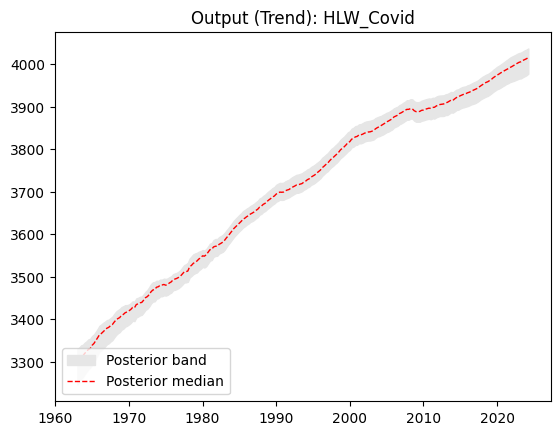

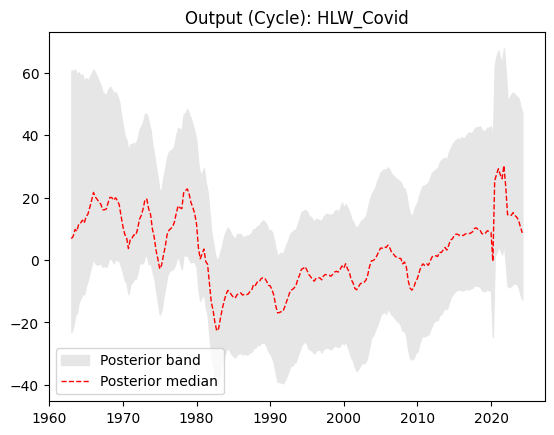

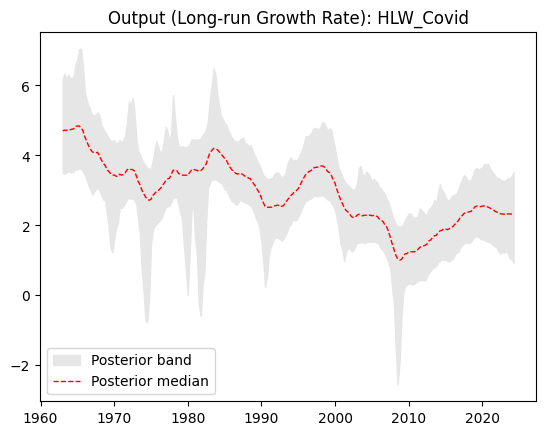

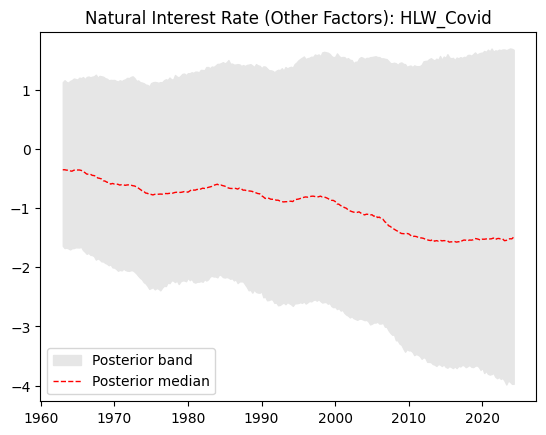

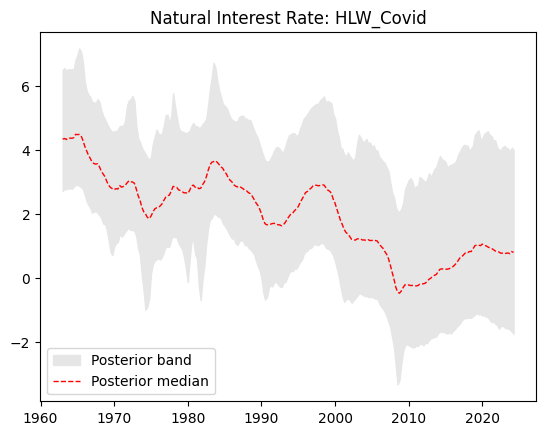

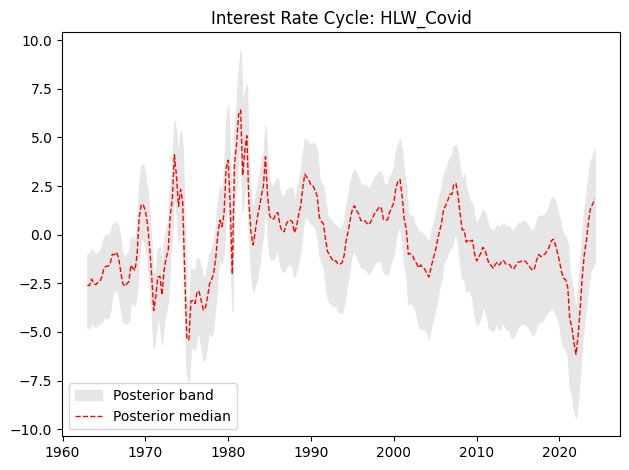

In [7]:
model.print_results()